In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\deeks\OneDrive\Desktop\DATA ANALYTICS\oasis\retail_sales_dataset.csv")  # Replace 'your_data.csv' with the actual filename


In [3]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150


In [76]:
#missing_vale
print(data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year                0
Month               0
dtype: int64


In [77]:
data.drop_duplicates(inplace=True)
print(data)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  Year     Month  
0           3

In [4]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\deeks\AppData\Local\Temp\ipykernel_5968\4072994341.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


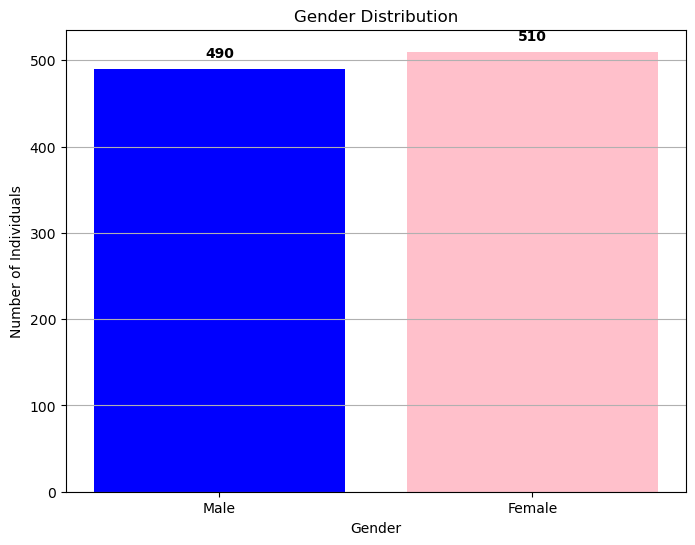

In [30]:
# Extract year and month from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
# Calculate total sales per month
monthly_sales = data.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], [male_count, female_count], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.title('Gender Distribution')
plt.grid(axis='y')

# Annotate the bars with the actual counts
for i, count in enumerate([male_count, female_count]):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()


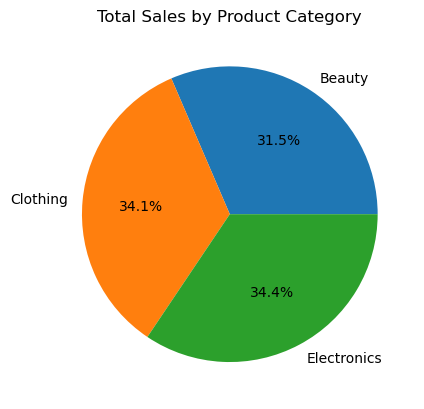

In [60]:
# Calculate total sales per product category
category_sales = data.groupby('Product Category')['Total Amount'].sum().reset_index()
category_sales
product_category_totals = data.groupby('Product Category')['Total Amount'].sum()
plt.pie(product_category_totals, labels=product_category_totals.index, autopct="%1.1f%%")
plt.title("Total Sales by Product Category")
plt.show()

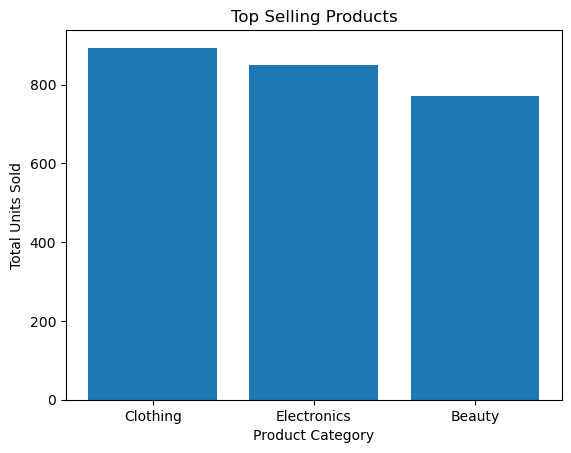

In [64]:
#top selling
combined_data = pd.concat([data['Product Category'], data['Quantity']], axis=1)
product_sales = combined_data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
plt.bar(product_sales.index[:5], product_sales.values[:5])  # Limit to top 5 products
plt.xlabel("Product Category")
plt.ylabel("Total Units Sold")
plt.title("Top Selling Products")
plt.show()

In [75]:
# Calculate total sales by customer
customer_sales = data.groupby('Customer ID')['Total Amount'].sum().reset_index()
customer_sales


,Customer ID,Total Amount
0,CUST001,150
1,CUST002,1000
2,CUST003,30
3,CUST004,500
4,CUST005,100
...,...,...
995,CUST995,30
996,CUST996,50
997,CUST997,90
998,CUST998,100


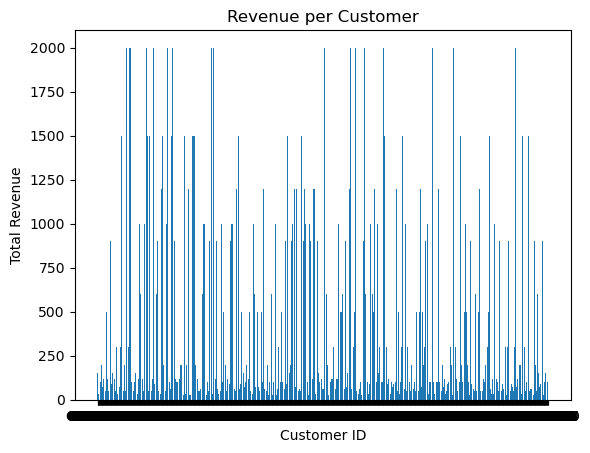

In [72]:
#Revenue per Customer (Bar chart)
customer_revenue = data.groupby('Customer ID')['Total Amount'].sum()
plt.bar(customer_revenue.index, customer_revenue.values)
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.title("Revenue per Customer")
plt.show()


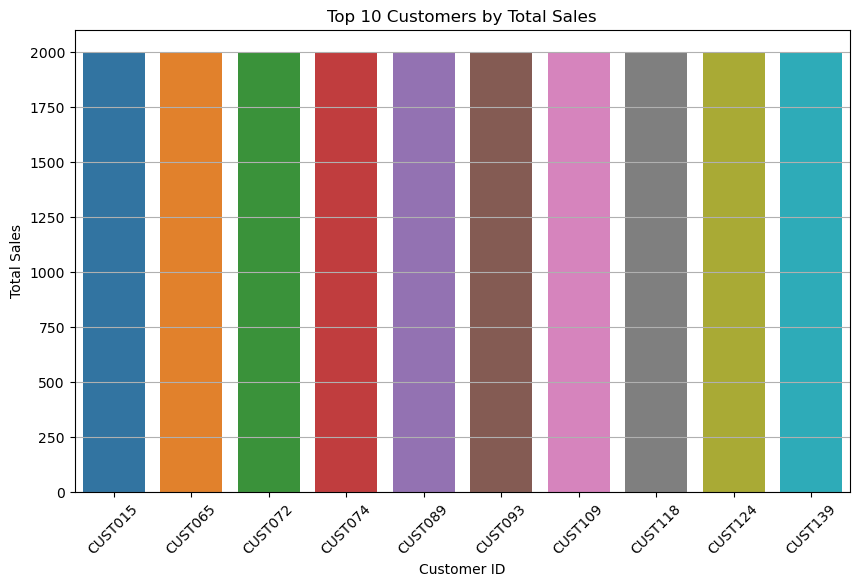

In [33]:
# Plot top 10 customers by total sales
top_customers = customer_sales.nlargest(10, 'Total Amount')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Customer ID', y='Total Amount')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [37]:
# Calculate total sales per month
monthly_sales = data.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthly_sales

,Year,Month,Total Amount
0,2023,1,35450
1,2023,2,44060
2,2023,3,28990
3,2023,4,33870
4,2023,5,53150
5,2023,6,36715
6,2023,7,35465
7,2023,8,36960
8,2023,9,23620
9,2023,10,46580


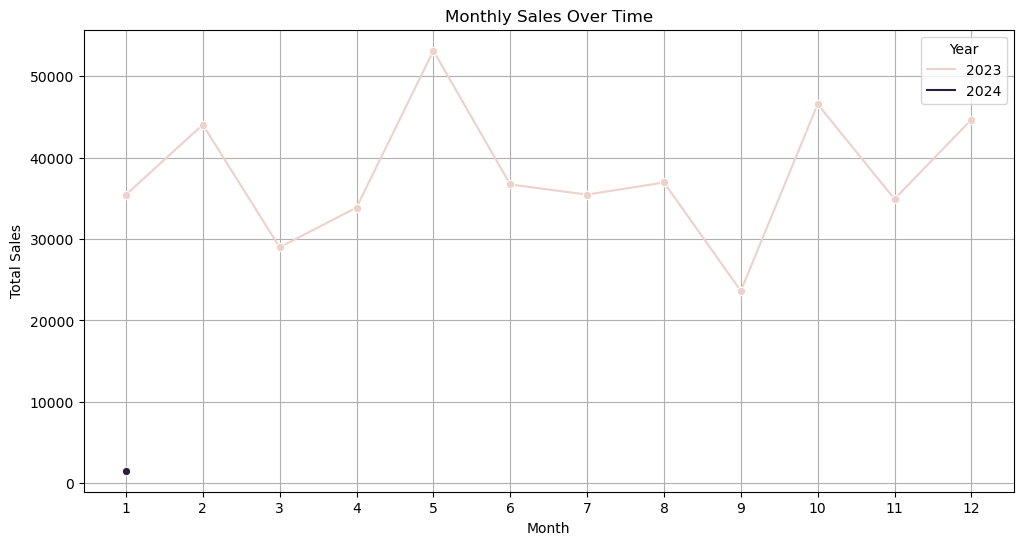

In [34]:
# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year', marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.show()

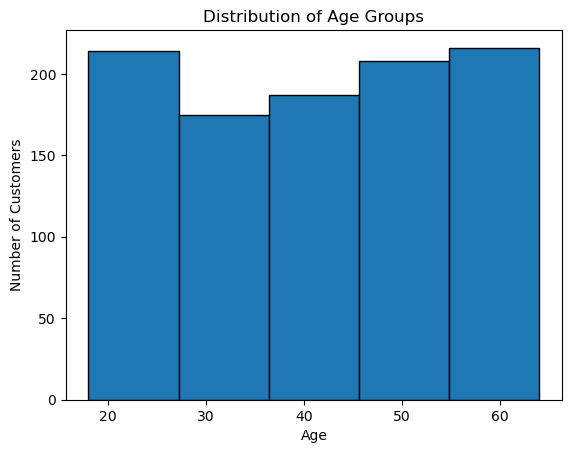

In [74]:
#Distribution of Age Groups (Histogram) 
plt.hist(data['Age'], bins=5, histtype='bar', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Distribution of Age Groups")
plt.show()